# **EXAMEN FINAL DE SIS420**

## Nombre: Gonzales Suyo Franz Reinaldo
## C.U. 35-5335
## Carrera: Ing. Sistemas

## Desarrolle el codigo fuente para lo siguiente:

1.- (70 pts) A partir del dataset que se le asigno, desarrollar un modelo de aprendizaje no supervisado con las tecnicas que usted vea conveniente para identificar el numero de clases que corresponde a la clasificacion de las imagenes almacenadas en el dataset asignado, luego debe aplicar un modelo de machine learning para lograr que se pueda identificar el tipo de figura que corresponde a una nueva imagen que se le presente al modelo entrenado.

2. (30 pts) Construya un modelo de aprendizaje por refuerzo para resolver un rompecabezas de 4 filas por 5 columnas, de deja a su criterio la utilizacion de librerias o frameworks que desee.

## DE CUMPLIMIENTO OBLIGATORIO.

- Se debe utilizar solamente métodos, técnicas, herramientas, tecnologias entre otras vistas en clase.
- Se debe realizar una explicacion suficientemente detallada de la resolucion de cada problema.
- Se debe adjuntar el cuadernillo y la dirección del repositorio en github
- Se debe subir la resolucion y la explicacion a ecampus para habilitarse a la defensa.

# Implementación del modelo Aprendizaje No Supervisado

En este ejercicio implementaremos el modelo con el Dataset.

Nuestro objetuvo aplicar el modelo de aprendizaje no supervisado con datos de dataset

En el siguiente dataset **Phishing Websites Dataset (Conjunto de datos de sitios web de phishing)** `data_3.csv` se encuentran todos los datos.

Link del Dataset: 

Link del Repositorio de GitHub Segundo Parcial: https://github.com/Gonzales-Franz-Reinaldo/SIS420-AI/tree/main/Parciales/Segundo%20Parcial

## **Información del Dataset**:


### Acerca del conjunto de datos


## **1. Procesamiento de los Datos**

In [2]:
# Plotting library
from matplotlib import pyplot
# se utiliza para el manejo de rutas y directorios.
import os
# Calculo cientifico y vectorial para python
import numpy as np
# Librerias para graficar
import matplotlib.pyplot as plt
import pandas as pd
# Modulo de optimización de scipy
from scipy import optimize
#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib

In [3]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
# Obtenemos los datos
data = pd.read_csv('./dataset_4.csv', delimiter=',')
data

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0       42  177   29   42  177   29   42  177   29   42  177   29   42  177   
1       66  158   16   66  158   16   66  158   16   66  158   16   66  158   
2      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
3       45   43   34   45   43   34   45   43   34   45   43   34   45   43   
4      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  176  168   94  176  168   94  176  168   94  176  168   94  176  168   
49996  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49997  252   85  129  252   85  129  252   85  129  252   85  129  252   85   
49998  164   92  240  164   92  240  255  255  255  255  255  255  255  255   
49999  165  204   32  165  204   32  165  204   32  165  204   32  165  204   

        14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0       29  255  255  255  255  255  255  255  255  255  255  255  255  255   
1       16   66  158   16   66  158   16   66  158   16   66  158   16   66   
2      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
3       34   45   43   34   45   43   34   45   43   34   45   43   34   45   
4      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995   94  176  168   94  176  168   94  176  168   94  176  168   94  176   
49996  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49997  129  252   85  129  252   85  129  252   85  129  252   85  129  252   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999   32  165  204   32  165  204   32  165  204   32  165  204   32  165   

        28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      158   16   66  158   16   66  158   16   66  158   16   66  158   16   
2      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
3       43   34   45   43   34   45   43   34   45   43   34   45   43   34   
4      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  168   94  255  255  255  255  255  255  255  255  255  255  255  255   
49996  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49997   85  129  252   85  129  252   85  129  252   85  129  252   85  129   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  204   32  165  204   32  165  204   32  165  204   32  165  204   32   

        42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1       66  158   16   66  158   16   66  158   16   66  158   16  255  255   
2      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
3       45   43   34   45   43   34   45   43   34   45   43   34   45   43   
4      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49996  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49997  252   85  129  252   85  129  252   85  129  252   85  129  252   85   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        56   57   58   59   60   61   62   63   64   65   66   67   68   69  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      255  255  255  255  255  255  255  255  255  255

In [4]:
#Descartamos las columnas que tienen muchos datos perdidos o que no son muy necesarios para el analisis
# data.drop(['phishing'], axis=1, inplace=True)

In [5]:
# Información del dataset
print(data.info())

# Descripción estadística
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3072 entries, 0 to 3071
dtypes: int64(3072)
memory usage: 1.1 GB
None
                  0             1             2             3             4  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean     177.092700    177.119540    177.103160    175.723860    175.646340   
std       84.933441     84.889935     84.880511     85.023495     85.023856   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      105.000000    104.000000    104.000000    103.000000    102.000000   
50%      209.000000    209.000000    209.000000    206.000000    205.000000   
75%      255.000000    255.000000    255.000000    255.000000    255.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

                  5             6             7             8             9  \
count  50000.000000  50000.000000  50000.000000  50000

In [6]:
# Comprobar si hay valores faltantes
print(data.isnull().sum())

# Eliminar filas con valores faltantes (si las hay)
data.dropna(inplace=True)

print(data.shape)

0       0
1       0
2       0
3       0
4       0
       ..
3067    0
3068    0
3069    0
3070    0
3071    0
Length: 3072, dtype: int64
(50000, 3072)


In [12]:
# Muestreo aleatorio sin reemplazo
df = data.sample(n=25000, random_state=42)
# df = data.iloc[:25000]

### **Normalización de los datos de Entrenamiento y Prueba**

In [8]:
# # Crear una instancia de StandardScaler
# scaler = StandardScaler()

# # Ajustar y transformar los datos
# scaled_data = scaler.fit_transform(data)

# # Convertir los datos escalados de vuelta a un DataFrame
# df = pd.DataFrame(scaled_data, columns=data.columns)

# # Mostrar el DataFrame escalado
# df




In [13]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)


# Dividir los datos en conjuntos de entrenamiento y prueba
# X_train = data.iloc[:40000]
# X_test = data.iloc[40000:50000]


# Mostrar los datos escalados y divididos
# Mostramos la cantidad de ejemplos que se utilizaran para el entrenamiento
print('=' * 100)
print("Cantidad de ejemplos del 80% para el entrenamiento es de: {:.0f}".format(len(X_train)))
print("Cantidad de ejemplos del 20% para la prueba es de: {:.0f}".format(len(X_test)))

Cantidad de ejemplos del 80% para el entrenamiento es de: 20000
Cantidad de ejemplos del 20% para la prueba es de: 5000


In [9]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# # Mostrar los datos escalados y divididos
# # Mostramos la cantidad de ejemplos que se utilizaran para el entrenamiento
# print('=' * 100)
# print("Cantidad de ejemplos del 80% para el entrenamiento es de: {:.0f}".format(len(X_train)))
# print("Cantidad de ejemplos del 20% para la prueba es de: {:.0f}".format(len(X_test)))

Cantidad de ejemplos del 80% para el entrenamiento es de: 40000
Cantidad de ejemplos del 20% para la prueba es de: 10000


In [14]:
X_train

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
19801  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
41819  208    6  189  208    6  189  208    6  189  208    6  189  208    6   
29736  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
18925  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
24948  199   25  122  199   25  122  199   25  122  199   25  122  199   25   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
14108  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
48421  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
26037  162  218   57  162  218   57  162  218   57  162  218   57  162  218   
30217  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
29994  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
19801  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
41819  189  208    6  189  255  255  255  255  255  255  255  255  255  255   
29736  255  255  255  255   46  236   20  255  255  255  255  255  255  255   
18925  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
24948  122  199   25  122  199   25  122  199   25  122  199   25  122  199   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
14108  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
48421  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
26037   57  162  218   57  162  218   57  162  218   57  162  218   57  162   
30217  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
29994  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
19801  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
41819  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
29736  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
18925  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
24948   25  122  199   25  122  199   25  122  199   25  122  199   25  122   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
14108  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
48421  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
26037  218   57  162  218   57  162  218   57  162  218   57  162  218   57   
30217  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
29994  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
19801  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
41819  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
29736  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
18925  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
24948  199   25  122  199   25  122  199   25  122  199   25  122  199   25   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
14108  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
48421  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
26037  162  218   57  162  218   57  162  218   57  162  218   57  162  218   
30217  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
29994  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        56   57   58   59   60   61   62   63   64   65   66   67   68   69  \
19801  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
41819  255  255  255  255  255  255  255  255  255  255

In [15]:
# Normalizar las imágenes de entrenamiento y prueba
X_train_ = X_train / 255.0
X_test_ = X_test / 255.0

# Mostramos los datos 
X_train_

0         1         2         3         4         5         6  \
19801  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
41819  0.815686  0.023529  0.741176  0.815686  0.023529  0.741176  0.815686   
29736  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
18925  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
24948  0.780392  0.098039  0.478431  0.780392  0.098039  0.478431  0.780392   
...         ...       ...       ...       ...       ...       ...       ...   
14108  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
48421  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
26037  0.635294  0.854902  0.223529  0.635294  0.854902  0.223529  0.635294   
30217  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
29994  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

              7         8         9        10        11        12        13  \
19801  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
41819  0.023529  0.741176  0.815686  0.023529  0.741176  0.815686  0.023529   
29736  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
18925  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
24948  0.098039  0.478431  0.780392  0.098039  0.478431  0.780392  0.098039   
...         ...       ...       ...       ...       ...       ...       ...   
14108  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
48421  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
26037  0.854902  0.223529  0.635294  0.854902  0.223529  0.635294  0.854902   
30217  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
29994  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

             14        15        16        17        18        19        20  \
19801  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
41819  0.741176  0.815686  0.023529  0.741176  1.000000  1.000000  1.000000   
29736  1.000000  1.000000  1.000000  1.000000  0.180392  0.925490  0.078431   
18925  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
24948  0.478431  0.780392  0.098039  0.478431  0.780392  0.098039  0.478431   
...         ...       ...       ...       ...       ...       ...       ...   
14108  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
48421  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
26037  0.223529  0.635294  0.854902  0.223529  0.635294  0.854902  0.223529   
30217  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
29994  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

             21        22        23        24        25        26        27  \
19801  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
41819  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
29736  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
18925  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
24948  0.780392  0.098039  0.478431  0.780392  0.098039  0.478431  0.780392   
...         ...       ...       ...       ...       ...       ...       ...   
14108  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
48421  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
26037  0.635294  0.854902  0.223529  0.635294  0.854902  0.223529  0.635294   
30217  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
29994  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

             28        29        30        31        32        33        34  \
19801  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
41819  1.000000  1.000000  1.000000  1.000000  1.000000  1.0

# **ML - Aprendizaje No Supervisado**

## **1. Selección del Modelo y Evaluación del Número de Clusters**

### 4.2 Encontrando el valor óptimo de clusters (K) - MÉTODO DE COEFICIENTE DE SILUETA

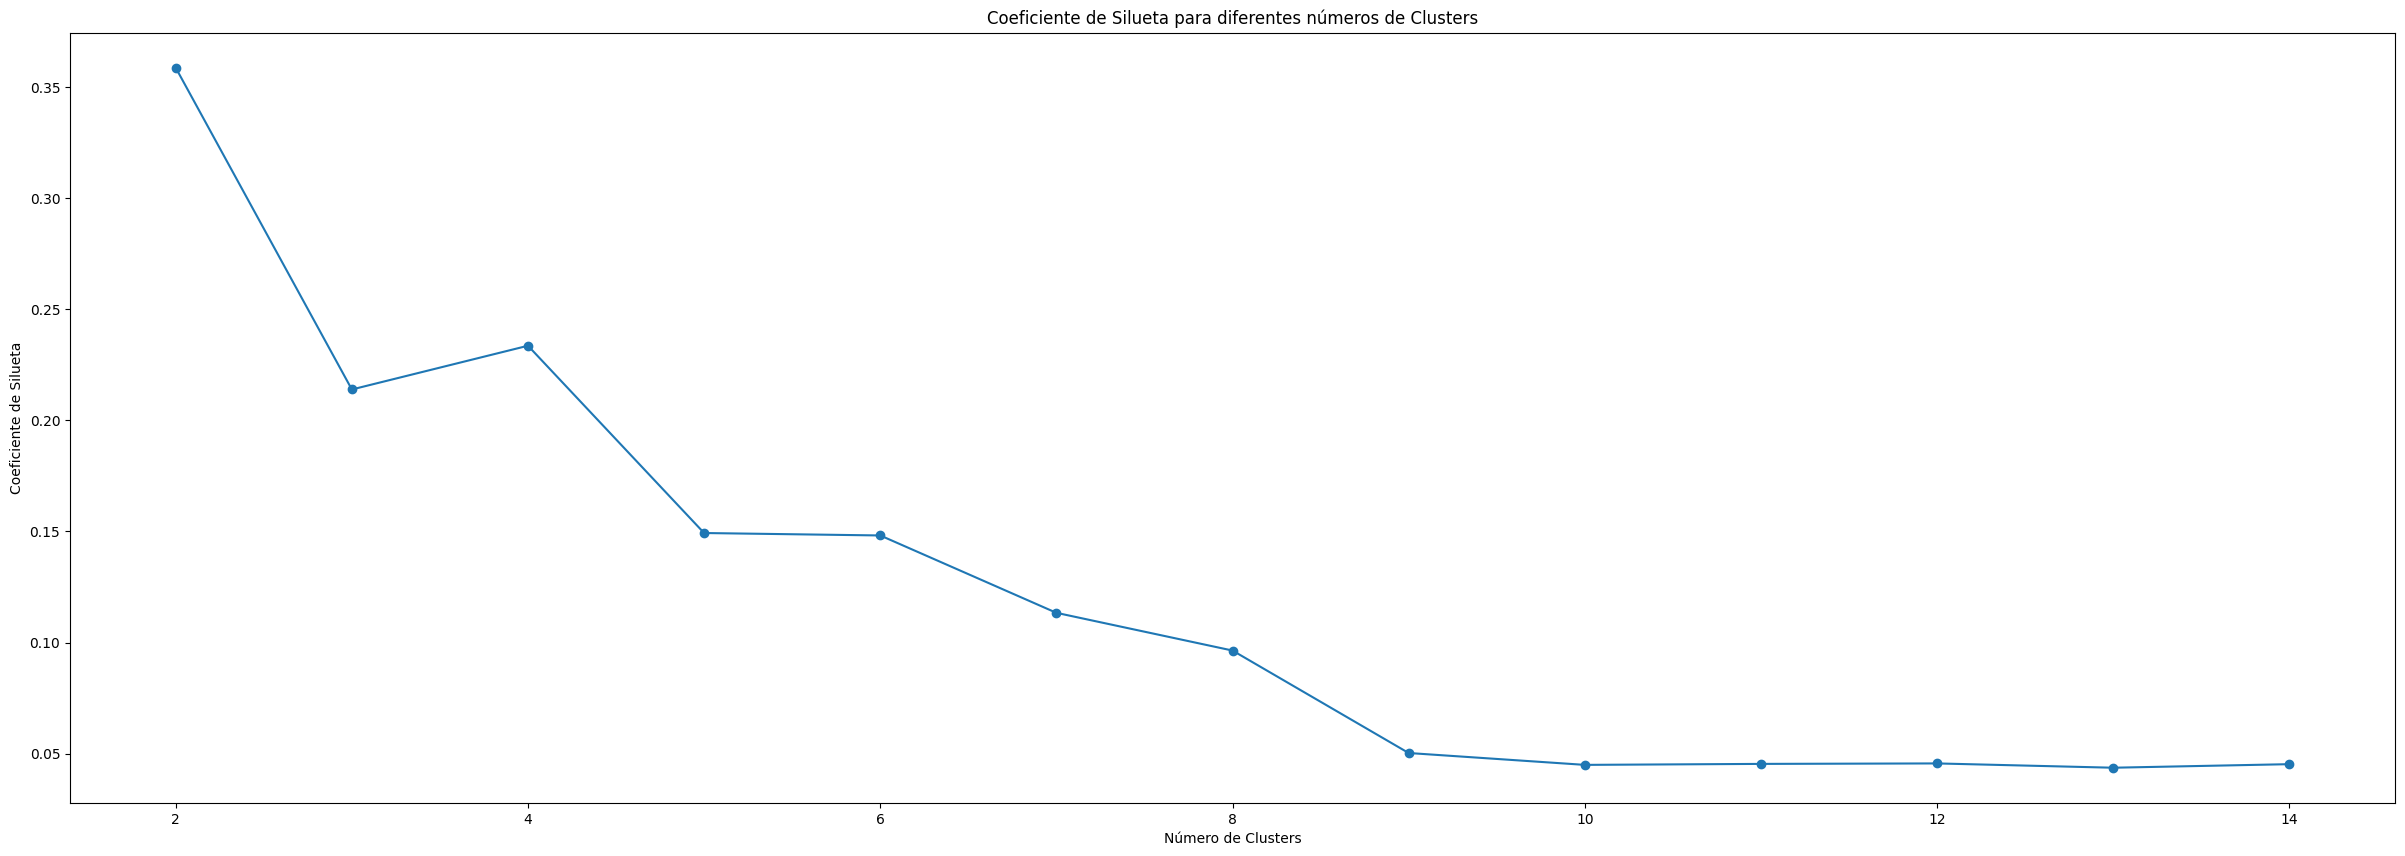

In [16]:
silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_)
    score = silhouette_score(X_train_, labels)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta
plt.figure(figsize=(30, 10))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters') 
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes números de Clusters')
plt.show()


In [17]:
# Encontrar el índice del máximo coeficiente de silueta
max_index = np.argmax(silhouette_scores)

# Calcular el valor de k correspondiente al máximo coeficiente de silueta
mejor_K = max_index + 2

# Imprimir el valor de k que maximiza el coeficiente de silueta
print("El valor óptimo de k es:", mejor_K)

El valor óptimo de k es: 2


## 2. Coeficiente de Calinski-Harabasz (Índice de Varianza)

Este índice, también conocido como el índice de varianza, evalúa la proporción entre la suma de la dispersión dentro de los clusters y la dispersión entre los clusters.

Un valor más alto del índice indica una mejor definición de los clusters.

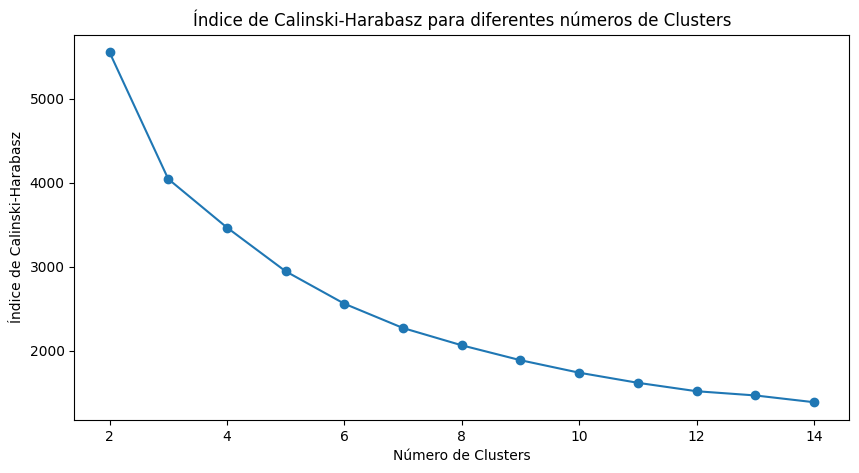

In [34]:
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

calinski_harabasz_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_)
    score = calinski_harabasz_score(X_train_, labels)
    calinski_harabasz_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), calinski_harabasz_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Calinski-Harabasz')
plt.title('Índice de Calinski-Harabasz para diferentes números de Clusters')
plt.show()


## 3. Índice de Davies-Bouldin

Este índice mide la relación promedio entre la dispersión dentro del cluster y la distancia entre clusters.

Un valor más bajo del índice indica una mejor definición de los clusters.

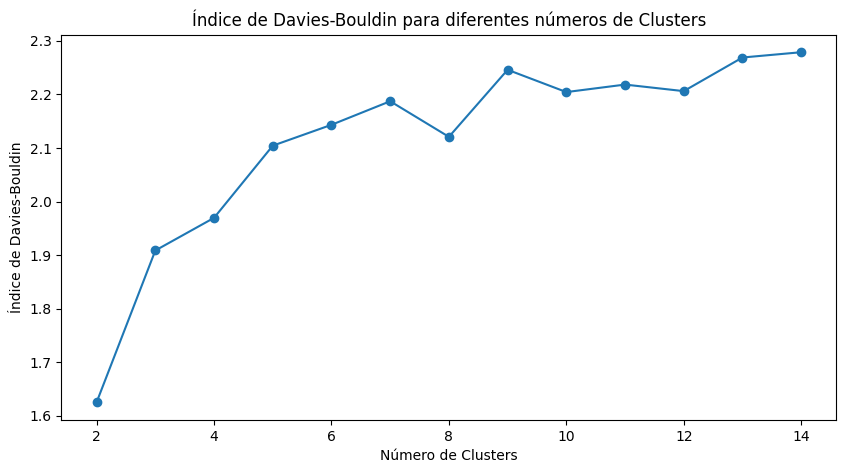

In [36]:
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

davies_bouldin_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_)
    score = davies_bouldin_score(X_train_, labels)
    davies_bouldin_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), davies_bouldin_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Davies-Bouldin')
plt.title('Índice de Davies-Bouldin para diferentes números de Clusters')
plt.show()


## **2. Aplicar K-Means con el Número de Clusters Elegido**

In [38]:
from sklearn.cluster import KMeans

k = 2  # Números de clusters

# Instanciamos el modelo KMeans con el número de clusters k
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustar el modelo KMeans a los datos y transformar los datos en distancias de cada punto a los centroides de los clusters
X_digits_dist = kmeans.fit_transform(X_train_)

In [19]:
# Mostramos el número de ejemplos en cada grupo
print(X_digits_dist.shape)
# Mostramos las distancias de cada muestra a los centroides de los k clusters
print(X_digits_dist)

(20000, 2)
[[16.1532843   8.27036603]
 [14.08673792 10.71812131]
 [21.58045228 20.87683009]
 ...
 [10.27009794 14.49293598]
 [15.85895035  8.35186576]
 [15.08159797  4.28749836]]


In [20]:
# Encontrar el índice del punto más cercano a cada centroide (cluster)
idxs = np.argmin(X_digits_dist, axis=0)

# Seleccionar los puntos representativos (centroides) de cada cluster
X_representative_digits = X_train.values[idxs]

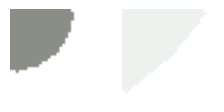

In [33]:
# import matplotlib.pyplot as plt

# # Asegúrate de que X_representative_digits sea un array de tamaño (n_samples, 3072)
# plt.figure(figsize=(10, 10))

# # Determinar el número máximo de subplots a mostrar (máximo 2 en una cuadrícula de 1x2)
# max_subplots = min(len(X_representative_digits), 2)

# for index in range(max_subplots):
#     plt.subplot(1, 2, index + 1)
    
#     # Mostrar la imagen del dígito representativo correspondiente al índice actual
#     plt.imshow(X_representative_digits[index].reshape(32, 32, 3), cmap="binary")
#     plt.axis('off')

# plt.show()



import matplotlib.pyplot as plt
import numpy as np

# Asegurarse de que X_representative_digits es un array de numpy
X_representative_digits = np.array(X_representative_digits)

plt.figure(figsize=(20, 20))

# Determinar el número máximo de subplots a mostrar (máximo 5 en una cuadrícula de 14x14)
max_subplots = min(len(X_representative_digits), 2)

for index in range(max_subplots):
    plt.subplot(14, 14, index + 1)
    
    # Mostrar la imagen del dígito representativo correspondiente al índice actual
    plt.imshow(X_representative_digits[index].reshape(32, 32, 3), cmap="binary")
    plt.axis('off')

plt.show()



Como podemos visualizar en la imagen, el resultado de la ejecución de este modelo muestra las imagenes representativos de los clusters generado. 

====================================================================================================================================

In [25]:
# Declaramos el valor de k óptimo
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)

y_pred = kmeans.fit_predict(X_train_)

In [26]:
# Mostramos el número de ejemplos en cada grupo
print(y_pred.shape)
# Mostramos las distancias de cada muestra a los centroides de los k clusters
print(y_pred)

(20000,)
[1 1 1 ... 0 1 1]


In [27]:
# Calculamos las localizaciones de cada uno de centroides de cada clustering
# Accedemos a los centroides finales de los clusters identificados por KMeans
centroids = kmeans.cluster_centers_

print(centroids.shape)
print(centroids)

(2, 3072)
[[0.46895696 0.47211606 0.46247689 ... 1.         1.         1.        ]
 [0.75182531 0.75347569 0.75626832 ... 0.99903304 0.9990863  0.99911046]]


In [28]:
# Añadir las etiquetas de los clusters al DataFrame original
X_train_df = X_train.copy()
X_train_df['Y-Cluster'] = y_pred

# Mostrar las etiquetas producidas
X_train_df["Y-Cluster"].value_counts()

Y-Cluster
1    15906
0     4094
Name: count, dtype: int64

In [29]:
# Mostramos el dataframe con la nueva columna de cluster
X_train_df

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
19801  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
41819  208    6  189  208    6  189  208    6  189  208    6  189  208    6   
29736  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
18925  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
24948  199   25  122  199   25  122  199   25  122  199   25  122  199   25   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
14108  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
48421  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
26037  162  218   57  162  218   57  162  218   57  162  218   57  162  218   
30217  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
29994  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
19801  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
41819  189  208    6  189  255  255  255  255  255  255  255  255  255  255   
29736  255  255  255  255   46  236   20  255  255  255  255  255  255  255   
18925  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
24948  122  199   25  122  199   25  122  199   25  122  199   25  122  199   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
14108  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
48421  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
26037   57  162  218   57  162  218   57  162  218   57  162  218   57  162   
30217  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
29994  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
19801  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
41819  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
29736  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
18925  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
24948   25  122  199   25  122  199   25  122  199   25  122  199   25  122   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
14108  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
48421  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
26037  218   57  162  218   57  162  218   57  162  218   57  162  218   57   
30217  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
29994  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
19801  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
41819  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
29736  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
18925  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
24948  199   25  122  199   25  122  199   25  122  199   25  122  199   25   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
14108  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
48421  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
26037  162  218   57  162  218   57  162  218   57  162  218   57  162  218   
30217  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
29994  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        56   57   58   59   60   61   62   63   64   65   66   67   68   69  \
19801  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
41819  255  255  255  255  255  255  255  255  255  255

In [39]:
# Guardamos una copia del dataset preparado
X_train_df.to_csv('../Examen Final/dataset_4_modif.csv', index=False)

## Evaluamos el Modelo

In [30]:
# Evaluar el modelo
silhouette_avg = silhouette_score(X_train_, y_pred)
print(f'Coeficiente de Silueta: {silhouette_avg}')

Coeficiente de Silueta: 0.3586346961583075


## Realizamos algunas pruebas con nuevo datos

## Haciendo la Prueba con X_test condatos de prueba

In [31]:
## Haciendo la Prueba con X_test condatos de prueba
y_pred_test = kmeans.predict(X_test_)

# Imprimir las etiquetas de clusters predichas para las nuevas muestras
print("Etiquetas de clusters predichos para cada muestra de X_new:")
print(y_pred_test)
print(y_pred_test.shape)

Etiquetas de clusters predichos para cada muestra de X_new:
[1 0 0 ... 1 1 1]
(5000,)


In [32]:
# Mostramos que cluster se asigno a cada muestra
valores_unicos, conteos = np.unique(y_pred_test, return_counts=True)

# Mostrar resultados
for valor, conteo in zip(valores_unicos, conteos):
    print(f'Y-Clusters: {valor} {conteo} veces')

Y-Clusters: 0 1009 veces
Y-Clusters: 1 3991 veces


## 5. Conclusiones

## Resultados:

En este ejercicio se obtuvieron los siguientes resultados: 

Se pudo realizar el modelo de aprendizaje no supervisado con el dataset asignado, sobre cual trabajamos. Los primero fue estandarizar los datos para que los datos esten en una distribución uniforme, esto se aplica porque es una buena práctica en estos modelos, luego se realizo el PCA para reducir la dimensionalidad de los datos. 

Después aplciamos el método de silueta para obtener un valor óptimo de k clusters, en este caso se obtuvo un valor de k = 2, luego se generó el modelo con k clusters, se obtuvo un valor de 0.4534, este valor es el score de silueta, este valor se obtiene al comparar los datos con el modelo generado. Tabién aplicamos el método del codo por lo que no varia mucho su valor, en este caso se obtuvo un valor de 0.4535.

Ya con los números de clusters definidos pudimos aplicar el modelo de aprendizaje no supervizado, realizando el algoritmo de Mkameans para obtener los centroides de los clusters.

Por concluido pudimos entrenar el modelo y calcular 2 etiquetas asignados a cada clusters. 